In [1]:
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer

from FusionLatticesAnalysis.LatticeFunctions.FusionRaussendorf_4GHZ import FusionLattice_Raussendorf_4GHZ
from FusionLatticesAnalysis.LatticeFunctions.FusionRaussendorf_6Rings import FusionLattice_Raussendorf_6Rings

from FusionLatticesAnalysis.RaussLattice_4GHZ import decoder_successprob_error_vs_loss_list_parallelized as decoder_4ghz
from FusionLatticesAnalysis.RaussLattice_6Rings import decoder_successprob_error_vs_loss_list_parallelized as decoder_6rings

Loaded C++ linear algebra functions for Linux OS


# Example: Fusion-based Raussendorf lattice - 6-qubit hexagons

In [2]:
L = 3

Lattice = FusionLattice_Raussendorf_6Rings(L, L, L)

print('# fusions:', Lattice.num_primal_fusions)

print('\n primal fusions matching matrix:')
H_matrix = Lattice.get_matching_matrix()
print(H_matrix)

print('\n Adjacency matrix of syndrom graph:')
synd_graph_amat = (H_matrix @ H_matrix.T) %2
print(synd_graph_amat)

# fusions: 162

 primal fusions matching matrix:
[[1 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 1]]

 Adjacency matrix of syndrom graph:
[[0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0]
 [1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0]
 [1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1]
 [1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0]
 [1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0]
 [0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0]
 [1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1]
 [0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0]
 [1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1]
 [1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0]
 [1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0]
 [0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0]
 [1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0]
 [0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1

### Loss-only error model

   Doing L= 3
   Doing L= 5
   Doing L= 7
Completed in  8.714076936012134  s


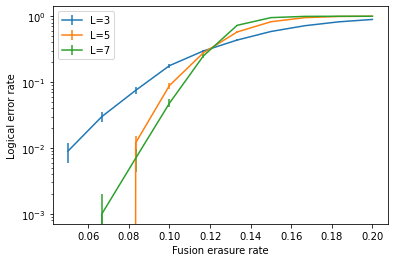

In [7]:
### Identify loss threshold for the lattice, assuming no Pauli errors
### Runs in approximately 10 seconds

loss_min = 0.05
loss_max = 0.20

num_trials = 1000

num_steps = 10

L_list = np.arange(3, 8, 2)

eras_ps = np.linspace(loss_min, loss_max, num_steps)
err_vs_eras_vals = np.array([(0, eras_p) for eras_p in eras_ps])

plt.figure()
start_t = default_timer()
for L_ix, L in enumerate(L_list):
    print('   Doing L=', L)
    this_data = \
        decoder_6rings(err_vs_eras_vals, L, num_loss_trials=num_trials, num_ec_runs_per_loss_trial=1)

    plt.errorbar(eras_ps, this_data,
                 yerr=(this_data * (1 - this_data) / num_trials) ** 0.5,
                 label="L={}".format(L))

end_t = default_timer()
print('Completed in ', end_t - start_t, ' s')
plt.yscale('log')
plt.xlabel("Fusion erasure rate")
plt.ylabel("Logical error rate")
plt.legend()
plt.show()

### Error-only error model

   Doing L= 3
   Doing L= 5
   Doing L= 7
Completed in  1.4328246020013466  s


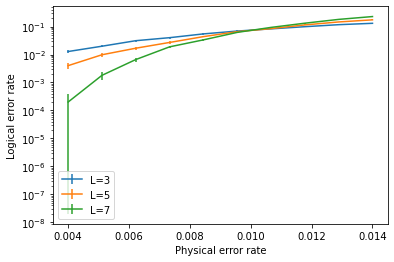

In [10]:
### Identify an Puali error rate threshold for the lattice, assuming no loss
### Runs in approximately 2 seconds

err_min = 0.004
err_max = 0.014

num_trials = 5000

num_steps = 10

L_list = np.arange(3, 8, 2)

err_ps = np.linspace(err_min, err_max, num_steps)
err_vs_eras_vals = np.array([(err_p, 0.) for err_p in err_ps])

plt.figure()
start_t = default_timer()
for L_ix, L in enumerate(L_list):
    print('   Doing L=', L)
    this_data = \
        decoder_6rings(err_vs_eras_vals, L, num_loss_trials=num_trials, num_ec_runs_per_loss_trial=1)

    plt.errorbar(err_ps, this_data,
                 yerr=(this_data * (1 - this_data) / num_trials) ** 0.5,
                 label="L={}".format(L))

end_t = default_timer()
print('Completed in ', end_t - start_t, ' s')

plt.yscale('log')
plt.xlabel("Physical error rate")
plt.ylabel("Logical error rate")
plt.legend()
plt.show()

### Both errors and losses

Error rate, Loss rate
[[0.00123607 0.03804226]
 [0.00145679 0.04551485]
 [0.00167752 0.05298743]
 [0.00189825 0.06046002]
 [0.00211897 0.06793261]
 [0.0023397  0.0754052 ]
 [0.00256043 0.08287778]
 [0.00278115 0.09035037]
 [0.00300188 0.09782296]
 [0.00322261 0.10529554]
 [0.00344333 0.11276813]
 [0.00366406 0.12024072]
 [0.00388479 0.1277133 ]
 [0.00410551 0.13518589]
 [0.00432624 0.14265848]] 

   Doing L= 3
   Doing L= 5
   Doing L= 7
Completed in  93.94362754304893  s


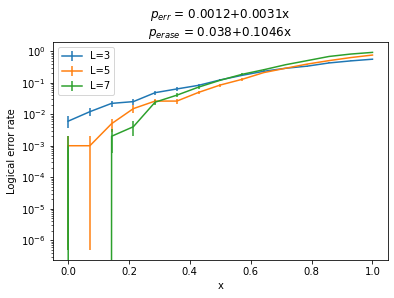

In [16]:
### Identify a threshold for the lattice in presence of both Pauli errors and losses

### For a given theta, loss and error rates are given by linear interpolations:
### loss = (loss_max - loss_min + x*loss_min) * cos(theta)
### error = (err_max - err_min + x*err_min) * sin(theta)
### with x ranging 0 to 1 in the scan.

### Runs in approximately 1 minute

loss_min = 0.04
loss_max = 0.15

err_min = 0.004
err_max = 0.014

num_loss_trials = 1000
num_ec_runs_per_loss_trial = 1

num_steps = 15
num_scans = 5

L_list = np.arange(3, 8, 2)


theta =  2*np.pi / 5.

x_vals = np.linspace(0, 1, num_steps)

err_vs_eras_vals_allvals = []
all_data = np.array([[None] * len(L_list)] * num_scans)

err_offset = err_min * np.cos(theta)
err_m = (err_max - err_min) * np.cos(theta)

loss_offset = loss_min * np.sin(theta)
loss_m = (loss_max - loss_min) * np.sin(theta)


err_vs_eras_vals = np.array([(err_m * x + err_offset,
                              loss_m * x + loss_offset) for x in x_vals])
print('Error rate, Loss rate')
print(err_vs_eras_vals, '\n')


plt.figure()
start_t = default_timer()
for L_ix, L in enumerate(L_list):
    print('   Doing L=', L)
    this_data = decoder_6rings(err_vs_eras_vals, L, num_loss_trials=num_loss_trials, num_ec_runs_per_loss_trial=num_ec_runs_per_loss_trial)
    plt.errorbar(x_vals, this_data,
                 yerr=(this_data * (1 - this_data) / (num_loss_trials * num_ec_runs_per_loss_trial)) ** 0.5,
                 label="L={}".format(L))
end_t = default_timer()
print('Completed in ', end_t - start_t, ' s')

plt.yscale('log')
plt.xlabel("x")
plt.ylabel("Logical error rate")

if np.sin(theta)==0:
    title_label_err = r'$p_{err}$ = '+str(err_offset)
else:
    title_label_err = r'$p_{err}$ = '+str(np.round(err_offset,4))+'+'+str(np.round(err_m,4))+'x'

if np.cos(theta)==0:
    title_label_loss = r'$p_{erase}$ = '+str(loss_offset)
else:
    title_label_loss = r'$p_{erase}$ = '+str(np.round(loss_offset,4))+'+'+str(np.round(loss_m,4))+'x'
      
plt.title(title_label_err+'\n'+title_label_loss)
plt.legend()
plt.show()

# Example: Fusion-based Raussendorf lattice - 4-qubit stars

In [16]:
L = 3

Lattice = FusionLattice_Raussendorf_4GHZ(L, L, L)

print('# fusions:', Lattice.num_primal_fusions)

print('\n primal fusions matching matrix:')
H_matrix = Lattice.get_matching_matrix()
print(H_matrix)

print('\n Adjacency matrix of syndrom graph:')
synd_graph_amat = (H_matrix @ H_matrix.T) %2
print(synd_graph_amat)

# fusions: 81

 primal fusions matching matrix:
[[1 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 1 1]]

 Adjacency matrix of syndrom graph:
[[0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0]
 [1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 

### Loss-only error model

   Doing L= 4
   Doing L= 6
   Doing L= 8
Completed in  9.415726052946411  s


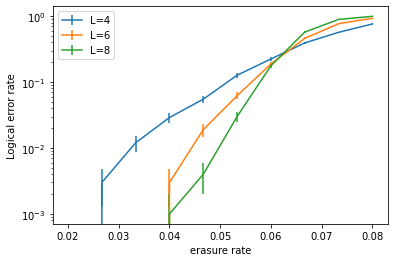

In [32]:
### Identify loss threshold for the lattice, assuming no Pauli errors
### Runs in approximately 10 seconds

loss_min = 0.02
loss_max = 0.08

num_trials = 1000

num_steps = 10

L_list = np.arange(4, 9, 2)

eras_ps = np.linspace(loss_min, loss_max, num_steps)
err_vs_eras_vals = np.array([(0, eras_p) for eras_p in eras_ps])

plt.figure()
start_t = default_timer()
for L_ix, L in enumerate(L_list):
    print('   Doing L=', L)
    # Takes into account that there are 4-degenerate edges in the cubic syndrome graph
    this_data = \
        decoder_4ghz(4*err_vs_eras_vals, L, num_loss_trials=num_trials,
                                                            num_ec_runs_per_loss_trial=1)

    plt.errorbar(eras_ps, this_data,
                 yerr=(this_data * (1 - this_data) / num_trials) ** 0.5,
                 label="L={}".format(L))

end_t = default_timer()
print('Completed in ', end_t - start_t, ' s')
plt.yscale('log')
plt.xlabel("erasure rate")
plt.ylabel("Logical error rate")
plt.legend()
plt.show()

### Error-only error model

   Doing L= 4
   Doing L= 6
   Doing L= 8
Completed in  1.7092153850244358  s


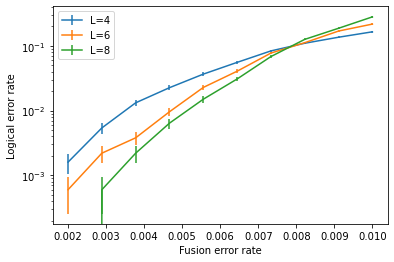

In [31]:
### Identify an Puali error rate threshold for the lattice, assuming no loss
### Runs in approximately 2 seconds

err_min = 0.002
err_max = 0.01

num_trials = 5000

num_steps = 10

L_list = np.arange(4, 9, 2)

err_ps = np.linspace(err_min, err_max, num_steps)
err_vs_eras_vals = np.array([(err_p, 0.) for err_p in err_ps])

plt.figure()
start_t = default_timer()
for L_ix, L in enumerate(L_list):
    print('   Doing L=', L)
    this_data = \
        decoder_4ghz(4*err_vs_eras_vals, L, #Takes into account that there are 4-degenerate edges in the cubic syndrome graph
                                                            num_loss_trials=num_trials,
                                                            num_ec_runs_per_loss_trial=1)

    plt.errorbar(err_ps, this_data,
                 yerr=(this_data * (1 - this_data) / num_trials) ** 0.5,
                 label="L={}".format(L))

end_t = default_timer()
print('Completed in ', end_t - start_t, ' s')

plt.yscale('log')
plt.xlabel("Fusion error rate")
plt.ylabel("Logical error rate")
plt.legend()
plt.show()

### Both errors and losses

Error rate, Loss rate
[[0.00061803 0.01902113]
 [0.00079462 0.02309709]
 [0.0009712  0.02717304]
 [0.00114778 0.031249  ]
 [0.00132436 0.03532496]
 [0.00150094 0.03940091]
 [0.00167752 0.04347687]
 [0.0018541  0.04755283]
 [0.00203068 0.05162878]
 [0.00220726 0.05570474]
 [0.00238385 0.0597807 ]
 [0.00256043 0.06385665]
 [0.00273701 0.06793261]
 [0.00291359 0.07200856]
 [0.00309017 0.07608452]] 

   Doing L= 3
   Doing L= 5
   Doing L= 7
Completed in  54.603256479953416  s


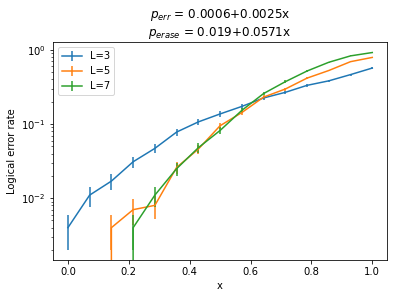

In [38]:
### Identify a threshold for the lattice in presence of both Pauli errors and losses

### For a given theta, loss and error rates are given by linear interpolations:
### loss = (loss_max - loss_min + x*loss_min) * cos(theta)
### error = (err_max - err_min + x*err_min) * sin(theta)
### with x ranging 0 to 1 in the scan.

### Runs in approximately 1 minute

loss_min = 0.02
loss_max = 0.08

err_min = 0.002
err_max = 0.01

num_loss_trials = 1000
num_ec_runs_per_loss_trial = 1

num_steps = 15
num_scans = 5

L_list = np.arange(3, 8, 2)


theta =  2*np.pi / 5.

x_vals = np.linspace(0, 1, num_steps)

err_vs_eras_vals_allvals = []
all_data = np.array([[None] * len(L_list)] * num_scans)

err_offset = err_min * np.cos(theta)
err_m = (err_max - err_min) * np.cos(theta)

loss_offset = loss_min * np.sin(theta)
loss_m = (loss_max - loss_min) * np.sin(theta)


err_vs_eras_vals = np.array([(err_m * x + err_offset,
                              loss_m * x + loss_offset) for x in x_vals])
print('Error rate, Loss rate')
print(err_vs_eras_vals, '\n')


plt.figure()
start_t = default_timer()
for L_ix, L in enumerate(L_list):
    print('   Doing L=', L)
    #Takes into account that there are 4-degenerate edges in the cubic syndrome graph
    this_data = decoder_4ghz(4*err_vs_eras_vals, L, num_loss_trials=num_loss_trials, num_ec_runs_per_loss_trial=num_ec_runs_per_loss_trial)
    plt.errorbar(x_vals, this_data,
                 yerr=(this_data * (1 - this_data) / (num_loss_trials * num_ec_runs_per_loss_trial)) ** 0.5,
                 label="L={}".format(L))
end_t = default_timer()
print('Completed in ', end_t - start_t, ' s')

plt.yscale('log')
plt.xlabel("x")
plt.ylabel("Logical error rate")

if np.sin(theta)==0:
    title_label_err = r'$p_{err}$ = '+str(err_offset)
else:
    title_label_err = r'$p_{err}$ = '+str(np.round(err_offset,4))+'+'+str(np.round(err_m,4))+'x'

if np.cos(theta)==0:
    title_label_loss = r'$p_{erase}$ = '+str(loss_offset)
else:
    title_label_loss = r'$p_{erase}$ = '+str(np.round(loss_offset,4))+'+'+str(np.round(loss_m,4))+'x'
      
plt.title(title_label_err+'\n'+title_label_loss)
plt.legend()
plt.show()